# Sundial Type Browser
## Import und Optionen

In [15]:
# Extension Import
from ipywidgets import *
from IPython.display import Javascript, display, clear_output
import pandas as pd
from PIL import Image
from collections import OrderedDict
import requests
from io import BytesIO
# CSV Import
reurl = 'https://raw.githubusercontent.com/computational-humanities/topoi/fkotschka/projects/sundials/DataFrame_Repo.csv'
df_re = pd.DataFrame.from_csv(BytesIO(requests.get(reurl).content))
clurl = 'https://raw.githubusercontent.com/computational-humanities/topoi/fkotschka/projects/sundials/DataFrame_Classification.csv'
df_cl = pd.DataFrame.from_csv(BytesIO(requests.get(clurl).content))
#Setting DF-Options
pd.set_option('display.max_colwidth', -1)

## Erstellen des DataFrames und der Formen- bzw Klassen Dictionaries

In [16]:
# Merging DataFrame columns and adding column 'Link'
dfcl_short = pd.DataFrame([pd.to_numeric(df_cl['ObjID'],downcast='float', errors='coerce'),pd.to_numeric(df_cl['Dialface1 ID'],downcast='float', errors='coerce'),pd.to_numeric(df_cl['Corpus Shape ID'],downcast='float', errors='coerce'),df_cl['Corpus Shape Name'],df_cl['Corpus Shape Certainty']]).T;
dfre_short = pd.DataFrame([df_re['Holder Location'],df_re['Site Location'],df_re['Dating'],df_re['ObjID']]).T;
dfmerged = pd.merge(dfre_short, dfcl_short , how='left' , on='ObjID');
dfmerged['Link'] = dfmerged['Dialface1 ID'].apply(lambda x: '<a href="http://repository.edition-topoi.org/collection/BSDP/object/{0}" target="_blank">Edition-Topoi.org</a>'.format(x))

In [17]:
# Creating / Sorting Class-Dict
dict_Classes = {'All':'All','Box': ['Box','Box-Variante','Angular Box'],'Rhodos':['Rhodos ohne vorstehenden Fuß','Rhodos mit vorstehendem Fuß','Rhodos mit unklarer Fuß-Situation','Schräger Zylinder'],'[roofed]':['[roofed] simple','[roofed] mit durchdringender Kugel','[roofed] mit Kappung oben'],'Deko':['Decorative Object, type 1','Decorative Object, type 2'],'Horizontale Flächen':['Horizontal Slab (rectangular)','Horizontal Slab (circular)','Pavement','Vertical high cylinder with horizontal top surface','Object with horizontal top surface, shape unknown'],'geneigte Platten':['Inclined Slab (rectangular)','Inclined Slab (hemicircle)','Inclined Slab'],'niedriger Steinblock':['Rectangular Cuboid (low)','Rectangular Cuboid (low), Sculpture','Rectangular Cuboid (low), with front opening'],'Spat':['Parallelpiped with inclined back and front faces','Parallelpiped with inclined back and front faces with foot','Rectangular Block with inclined back side'],'Senkrechte Fronten':['Viertelkugel mit Fuß','Rectangular Cuboid (high)'],'Vertikale Flächen':['Vertical south facing slab (rectangular)','Vertical south facing slab (almost semicircular)','Vertical south facing wall','Roughly shaped block with vertical plane south facing surface','Zwei rechtwinklig verbundene rechtwinklige Platten mit halbbogenförmigen Ausschnitten','Rechtwinklig verbundene Steinelemente mit vertikalen Flächen','SZickzack'],'Second Use':['Rectangular Column (second use)','Altar (second use)'],'Einzelstücke':['[roofed] Skulptur','[roofed] Karthago','[roofed] Pompei','[roofed] unklar','Tenos','Tower of the Winds','Inclined Block','Rankengöttin','Doppel-SD auf Fuß','nicht weiter spezifizierte Einzelstücke'],'Andere': ['Miniatur London, Ephesos','Stela','Globe'],'Nicht Klassifiziert': ['classification not available','classification not possible','object does not meet criteria for being classified']}
od_Classes = OrderedDict(sorted(dict_Classes.items(), key=lambda t: t[0]))

In [18]:
# Creating / Sorting Formen-Dict
dict_Formen = {'Box':1, 'Box-Variante':2,'Rhodos ohne vorstehenden Fuß':3,'Rhodos mit vorstehendem Fuß':4,'Rhodos mit unklarer Fuß-Situation':5,'Angular Box':6,'Viertelkugel mit Fuß':7,'Rectangular Cuboid (low)':8,'Rectangular Cuboid (low), Sculpture':9,'Rectangular Cuboid (low), with front opening':10,'Rectangular Cuboid (high)':11,'Decorative Object, type 1':12,'Decorative Object, type 2':13,'Miniatur London, Ephesos':14,'Parallelpiped with inclined back and front faces':15,'Parallelpiped with inclined back and front faces with foot':16,'Rectangular Block with inclined back side':17,'Inclined Slab':18,'Inclined Slab (hemicircle)':19,'Inclined Slab (rectangular)':20,'Horizontal Slab (rectangular)':21,'Horizontal Slab (circular)':22,'Pavement':23,'Vertical high cylinder with horizontal top surface':24,'Object with horizontal top surface, shape unknown':25,'Vertical south facing slab (rectangular)':26,'Vertical south facing slab (almost semicircular)':27,'Vertical south facing wall':28,'Roughly shaped block with vertical plane south facing surface':29,'Zwei rechtwinklig verbundene rechtwinklige Platten mit halbbogenförmigen Ausschnitten':30,'Rechtwinklig verbundene Steinelemente mit vertikalen Flächen':31,'SZickzack':32,'Curved circular disc (onesided)':33,'Curved circular disc (twosided)':34,'Stela':35,'Rectangular Column (second use)':36,'Altar (second use)':37,'Globe':38,'[roofed] simple':39,'[roofed] mit durchdringender Kugel':40,'[roofed] mit Kappung oben':41,'[roofed] Skulptur':42,'[roofed] Karthago':43,'Tenos':44,'[roofed] Pompei':45,'[roofed] unklar':46,'Bowl Delos (cut)':47,'Tower of the Winds':48,'Inclined Block':49,'Schräger Zylinder':50,'Rankengöttin':51,'Doppel-SD auf Fuß':52,'nicht weiter spezifizierte Einzelstücke':99,'classification not available':101,'classification not possible':0,'object does not meet criteria for being classified':100}
od_Formen = OrderedDict(sorted(dict_Formen.items(), key=lambda t: t[0]))

## Funktionen

In [19]:
# Ausgabe des DataFrames auf Knopfdruck
def create_table(push):
    cb_false = list(x for x in list([del_col(ObjID),del_col(CsI),del_col(DiFa),del_col(Csn),del_col(Hol),del_col(Si),del_col(Li),del_col(Csc),del_col(Dat)]) if x is not None)
    df = build_df(dfmerged.loc[dfmerged['Corpus Shape ID'] == d2.value]).sort_values([cb.children[3].children[0].value])
    if len(df)>0:
        df = df.style.set_properties(**{'background-color': '#ACA490','color': 'black','border-color': 'black','cell-color': 'black','font-family': 'Dosis','head-color':'blue'})
    else:
        df = 'Keine Sonnenuhr dieses Typs in der Datenbank'
    clear_output(wait=True)
    display(df)

# Erstellen der Kurzliste für das 2. Dropdownmenu 
def split(di):
    try:
        {key:di[key] for key in d1.value}
        return {key:di[key] for key in d1.value}
    except: 
        return di  

# Ausgabe von ábgewählten Checkboxen
def del_col(cb):
    if cb.value == False:
        return cb.description
    
# Ausgabe des Typenbildes
def img(value):
    clear_output(wait = True)
    display(Image.open(BytesIO(requests.get('https://github.com/computational-humanities/topoi/blob/fkotschka/projects/sundials/Konusformen/KF-'+str(d2.value)+'.png?raw=true').content)))
    
# Erstellen des DataFrames und Löschen unerwünschter Spalten
def build_df(x):
    cb_false = list(x for x in list([del_col(ObjID),del_col(CsI),del_col(DiFa),del_col(Csn),del_col(Hol),del_col(Si),del_col(Li),del_col(Csc),del_col(Dat)]) if x is not None)
    if len(cb_false) > 0:
        for col in x.columns:
            if col in cb_false:
                del x[col]
        return x
    else: 
        return x
    
# Ändern von Dropdownmenu 2
def obs(*args):
    with d2.hold_trait_notifications():
        d2.options=split(od_Formen) 
        
# Ändern der Radiobuttons
def true_list(*args):
# Äquivalent zu del_col
    def true_col(cb):
        if cb.value == True:
            return cb.description
    with so.hold_trait_notifications():
        so.options = list( x for x in list([true_col(ObjID),true_col(DiFa), true_col(Hol),true_col(Si),true_col(Csc), true_col(Dat)]) if x is not None)

## Erstellen der Widgets

In [20]:
# Button
button = widgets.Button(description="Anzeige der Tabelle", button_style='success')
button.on_click(create_table)

In [21]:
#Checkboxes
ObjID = widgets.Checkbox(value=True,description='ObjID',disabled=False)
DiFa = widgets.Checkbox(value=False,description='Dialface1 ID',disabled=False)
Hol = widgets.Checkbox(value=True,description='Holder Location',disabled=False)
Si = widgets.Checkbox(value=True,description='Site Location',disabled=False)
Li = widgets.Checkbox(value=True,description='Link',disabled=False)
CsI= widgets.Checkbox(value=True,description='Corpus Shape ID',disabled=False)
Csn= widgets.Checkbox(value=False,description='Corpus Shape Name',disabled=False)
Csc= widgets.Checkbox(value=True,description='Corpus Shape Certainty',disabled=False)
Dat= widgets.Checkbox(value=True,description='Dating',disabled=False)

In [22]:
# Radiobuttons
so = widgets.RadioButtons(options=['ObjID', 'Corpus Shape Certainty','Site Location','Holder Location','Dating'],description='Sort by:')

In [23]:
# Dropdown
d1=widgets.Dropdown(description='BoxClass',options=od_Classes)
d2=widgets.Dropdown(description='BoxForm',options=split(od_Formen))

In [24]:
# Output Boxen
label_layout = Layout()
cb_items = [Box([ObjID,DiFa,CsI], layout=Layout(display='flex',flex_flow='row',justify_content='flex-start')),Box([Csn,Csc,Si], layout=Layout(display='flex',flex_flow='row',justify_content='flex-start')),Box([Hol,Dat,Li], layout=Layout(display='flex',flex_flow='row',justify_content='flex-start')),Box([so], layout=Layout(display='flex',flex_flow='row',justify_content='center'))]
cb = Box(cb_items, layout=Layout(flex_flow='column',border='solid 1px #618B9D',width='410px'))
ddb_items = [Box([d1],layout=Layout(display='flex',flex_flow='row',justify_content='flex-start')),Box([d2],layout=Layout(display='flex',flex_flow='row',justify_content='flex-start'))]
ddb = Box(ddb_items, layout=Layout(flex_flow='column',border='solid 1px #618B9D',width='410px'))

## Observe-Befehle um Änderungen in Widgets abzufangen, die sich auf nachfolgende Widgets auswirken

In [25]:
# Observe 
ObjID.observe(true_list)
DiFa.observe(true_list)
Hol.observe(true_list)
Si.observe(true_list)
Csc.observe(true_list)
Dat.observe(true_list)
d1.observe(obs)
d2.observe(img)

## Anzeige der Widgets

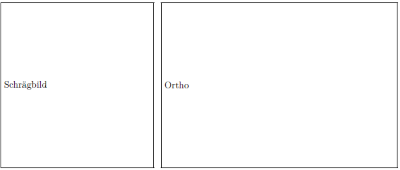

In [26]:
# Widget Display
display(ddb,cb)
Image.open(BytesIO(requests.get('https://github.com/computational-humanities/topoi/blob/fkotschka/projects/sundials/Konusformen/KF-0.png?raw=true').content))

In [27]:
# Widget Button
display(button)